In [ ]:
import pandas as pd
df = pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [ ]:
df.shape

NameError: ignored

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
train_data = df.iloc[:,1:2]

In [ ]:
train_data

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [ ]:
train_data.shape

(2035, 1)

In [ ]:
train_data.head()

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scale.fit_transform(train_data)

In [ ]:
#convert to timestamp of 60
import numpy as np
x_train = []
y_train = []
for i in range(60,2035):
  x_train.append(train_data_scaled[i-60:i,0])
  y_train.append(train_data_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1975, 60)

In [ ]:
#reshgaping to 3D array
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1975, 60, 1)

In [ ]:
#create model
from keras import Sequential
from keras.layers import Dense,LSTM, Dropout
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [ ]:
df2 = pd.read_csv("/content/tatatest.csv")

In [ ]:
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,24-10-2018,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,23-10-2018,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,22-10-2018,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,19-10-2018,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,17-10-2018,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [ ]:
test_data = df2.iloc[:,1:2]

In [ ]:
test_data.head()

,Open
0,220.10
1,221.10
2,229.45
3,230.30
4,237.70


In [ ]:
dfx = pd.read_csv("/content/NSE-TATAGLOBAL.csv")
train_data1 = dfx.iloc[:,1:2]
train_data1 = pd.DataFrame(train_data1)
print(train_data1.shape)
test_data = pd.DataFrame(test_data)
det = test_data.append(train_data1)

(2035, 1)


<ipython-input-22-c9d56daf7f0a>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  det = test_data.append(train_data1)


In [ ]:
det.shape

(2051, 1)

In [ ]:
det = det.values
print(det)

[[220.1 ]
 [221.1 ]
 [229.45]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


In [ ]:
scale = MinMaxScaler(feature_range = (0,1))
test_data_scaled = scale.fit_transform(det)

In [ ]:
#convert to timestamp of 60
import numpy as np
x_test = []
y_test = []
for i in range(60,2035):
  x_test.append(test_data_scaled[i-60:i,0])
  y_test.append(test_data_scaled[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(1975, 60, 1)

In [ ]:
model.compile(optimizer = "sgd", loss="mean_squared_error", metrics = ["accuracy"])
#model.fit(x_train,y_train,epochs = 10, batch_size = 32)
model.fit(x_train, y_train, epochs = 50, validation_data = (x_test,y_test), verbose = 1)

Epoch 1/50
62/62 [==============================] - 12s 122ms/step - loss: 0.0235 - accuracy: 5.0633e-04 - val_loss: 0.0220 - val_accuracy: 5.0633e-04
Epoch 2/50
62/62 [==============================] - 6s 89ms/step - loss: 0.0195 - accuracy: 5.0633e-04 - val_loss: 0.0174 - val_accuracy: 5.0633e-04
Epoch 3/50
62/62 [==============================] - 7s 106ms/step - loss: 0.0152 - accuracy: 0.0010 - val_loss: 0.0128 - val_accuracy: 0.0010
Epoch 4/50
62/62 [==============================] - 6s 94ms/step - loss: 0.0108 - accuracy: 0.0010 - val_loss: 0.0086 - val_accuracy: 0.0010
Epoch 5/50
62/62 [==============================] - 6s 104ms/step - loss: 0.0069 - accuracy: 0.0010 - val_loss: 0.0055 - val_accuracy: 0.0010
Epoch 6/50
62/62 [==============================] - 6s 90ms/step - loss: 0.0047 - accuracy: 0.0010 - val_loss: 0.0035 - val_accuracy: 0.0010
Epoch 7/50
62/62 [==============================] - 7s 113ms/step - loss: 0.0035 - accuracy: 0.0010 - val_loss: 0.0026 - val_accuracy:

In [ ]:
ynew = model.predict(x_test)

62/62 [==============================] - 4s 27ms/step


In [ ]:
ynew.shape

(1975, 1)

In [ ]:
test_inverse_predicted = scale.inverse_transform(ynew)

In [ ]:
slic_data = pd.concat([df.iloc[60:2035,1:2].copy(),pd.DataFrame(test_inverse_predicted,columns = ['open_predicted'],index=df.iloc[60:2035,1:2].index)],axis=1)

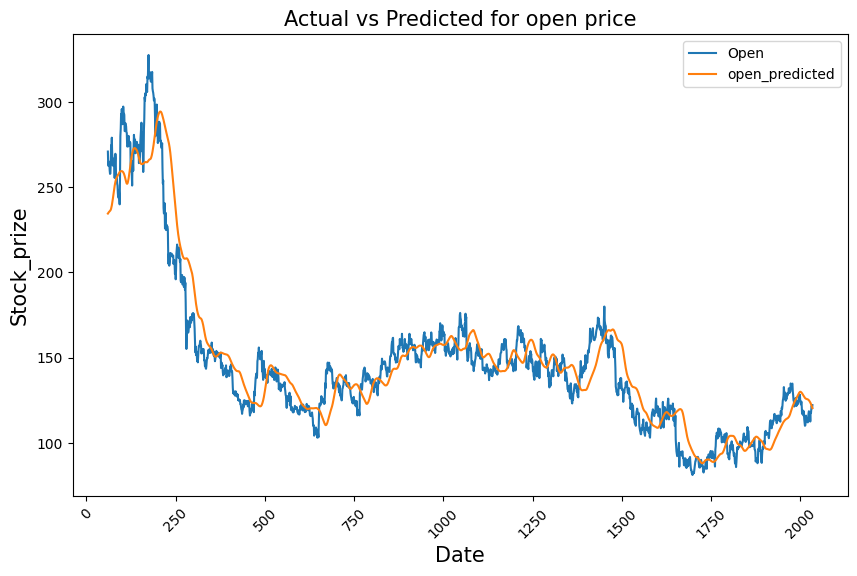

In [ ]:
import matplotlib.pyplot as plt
slic_data[["Open","open_predicted"]].plot(figsize = (10,6))
plt.xticks(rotation = 45)
plt.xlabel("Date", size = 15)
plt.ylabel("Stock_prize", size = 15)
plt.title("Actual vs Predicted for open price", size = 15)
plt.show()